In [0]:
from fastai.vision import *

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [0]:
folder = 'stanford'
file = 'stanford.txt'

In [0]:
folder = 'mit'
file = 'mit.txt'

In [0]:
folder = 'harvard'
file = 'harvard.txt'

In [0]:
folder = 'uchicago'
file = 'uchicago.txt'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir= "/content/gdrive/My Drive/"
base_dir = root_dir + 'ML Data/'

Mounted at /content/gdrive


In [0]:
path = Path(base_dir + 'data/universities')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

In [0]:
classes = ['stanford', 'mit', 'harvard', 'uchicago']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs = 32).normalize(imagenet_stats)

In [12]:
data.classes

['harvard', 'mit', 'stanford', 'uchicago']

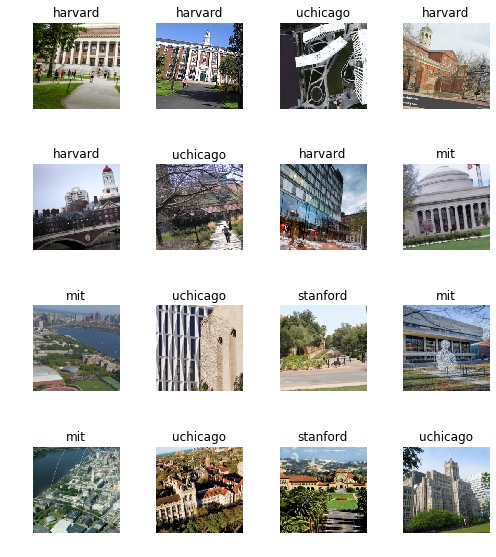

In [0]:
data.show_batch(rows=4, figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['harvard', 'mit', 'stanford', 'uchicago'], 4, 545, 136)

In [0]:
learn = cnn_learner(data, models.densenet201, metrics=accuracy, wd=1e-2, bn_wd=True, true_wd=True, loss_func=LabelSmoothingCrossEntropy(), pretrained=True, ps=0.5)

In [43]:
learn.fit_one_cycle(9)

epoch,train_loss,valid_loss,accuracy,time
0,1.646196,1.112742,0.595588,00:13
1,1.297296,1.003886,0.676471,00:12
2,1.136796,0.952021,0.691176,00:12
3,0.978699,0.957167,0.691176,00:12
4,0.871007,0.878280,0.735294,00:12
5,0.789490,0.873225,0.735294,00:12
6,0.717534,0.883337,0.750000,00:13
7,0.663610,0.879652,0.742647,00:12
8,0.632339,0.875995,0.735294,00:13


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 3.31E-07


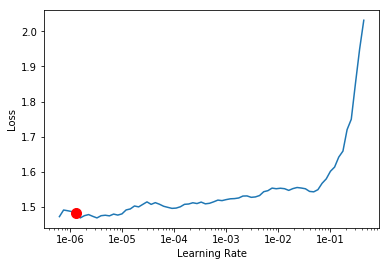

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True, return_fig=True)
lr = learn.recorder.min_grad_lr

In [0]:
learn.fit_one_cycle(3, max_lr=slice(1e-6,3.3e-7))

epoch,train_loss,valid_loss,accuracy,time
0,1.475030,1.396270,0.255474,00:18
1,1.525144,1.380126,0.299270,00:19
2,1.533712,1.387805,0.255474,00:18


In [0]:
learn.load('stage-1')

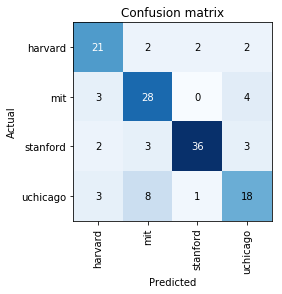

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

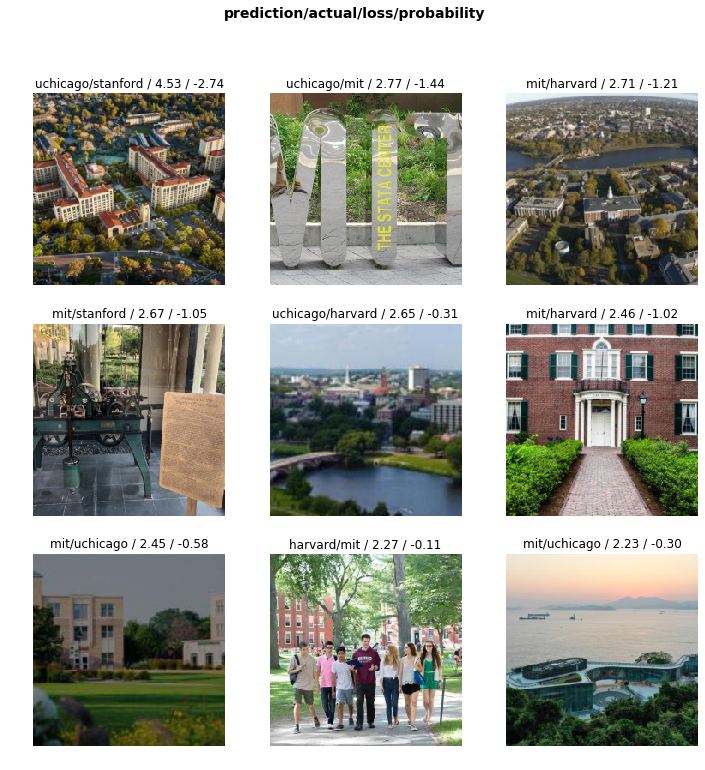

In [47]:
interp.plot_top_losses(9)

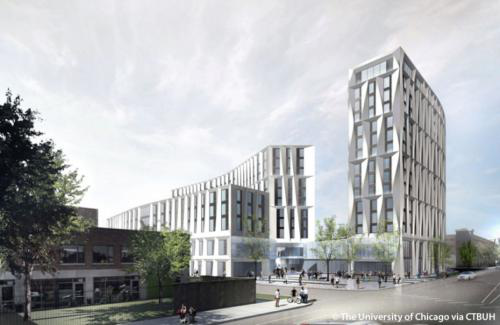

In [48]:
img = open_image(path/'uchicago'/'00000087.jpg')
img

In [0]:
learn.export('export.pkl')
learn = load_learner(path)

In [49]:
learn.predict(img)

(Category uchicago, tensor(3), tensor([-1.3650, -0.4183, -0.8851,  2.4259]))